# Linear Regression

In [79]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *
import statsmodels.api as sm
import statsmodels.formula.api as smf


%matplotlib inline

In [80]:
# DATA

hw = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/heightWeight.csv")

In [81]:
hw.head()

,height,weight,diet,age
0,161.187053,88.454144,meat,60
1,178.692677,101.895004,meat,50
2,176.647599,97.503690,meat,61
3,205.353240,121.129281,meat,14
4,200.516263,117.490528,meat,44


## Plot/Explore

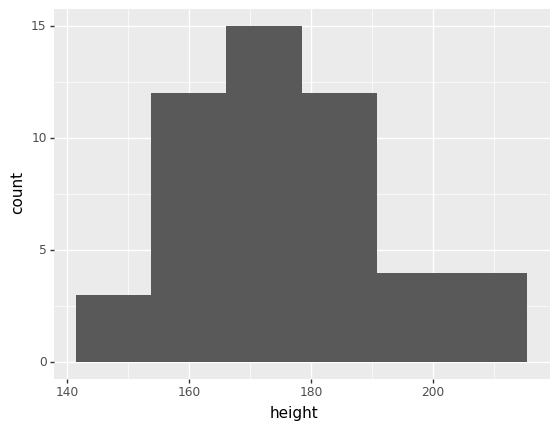

<ggplot: (-9223372036551165710)>

In [82]:
(ggplot(hw, aes("height")) + geom_histogram())

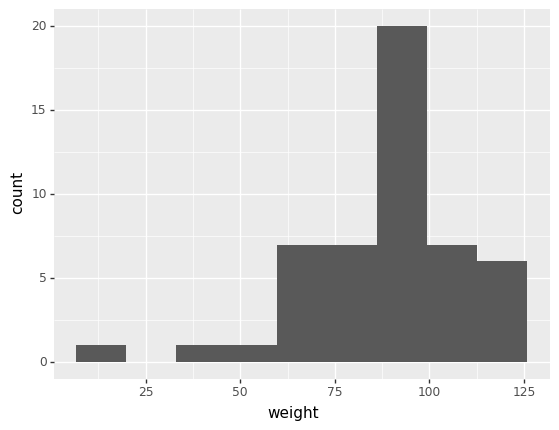

<ggplot: (-9223372036551281734)>

In [83]:
(ggplot(hw, aes("weight")) + geom_histogram())

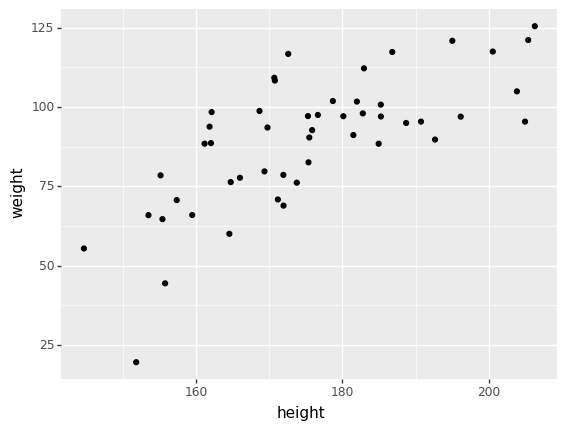

<ggplot: (304407139)>

In [84]:
(ggplot(hw, aes("height", "weight")) + geom_point())

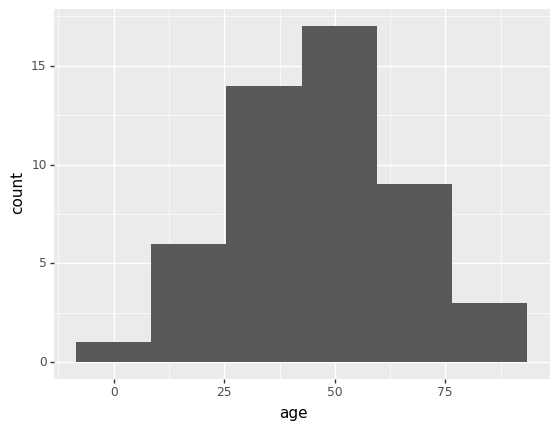

<ggplot: (303571944)>

In [85]:
(ggplot(hw, aes("age")) + geom_histogram())

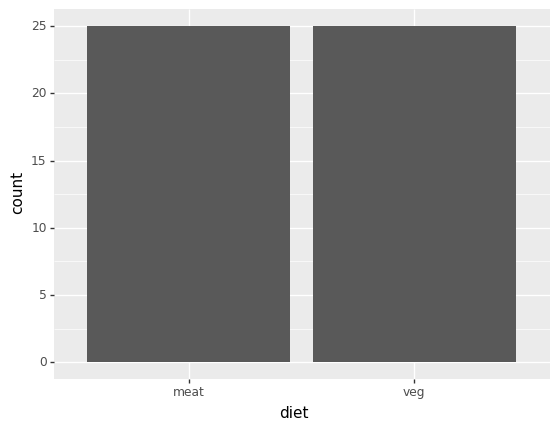

<ggplot: (-9223372036551327523)>

In [86]:
(ggplot(hw, aes("diet")) + geom_bar())

## Run an (Inferential) Regression Model

### Weight ~ Height

In [87]:
model = smf.ols(formula = "weight ~ height", data = hw)

In [88]:
output = model.fit()

In [89]:
output.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     51.94
Date:                Mon, 24 Feb 2020   Prob (F-statistic):           3.55e-09
Time:                        11:35:38   Log-Likelihood:                -203.47
No. Observations:                  50   AIC:                             410.9
Df Residuals:                      48   BIC:                             414.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -82.2887     23.932     -3.438      0.001    -130.408     -34.170
height         0.9786      0.136      7.207      0.000       0.706       1.252
==============================================================================
Omnibus:                        4.830   Durbin-Watson:                   1.725
Prob(Omnibus):                  0.089   Jarque-Bera (JB):                3.910
Skew:                          -0.466   Prob(JB):                        0.142
Kurtosis:                       4.004   Cond. No.                     2.06e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Weight ~ Height + Diet

In [90]:
model1 = smf.ols(formula = "weight ~ height + diet", data = hw)

In [91]:
output1 = model1.fit()

In [92]:
output1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     29.16
Date:                Mon, 24 Feb 2020   Prob (F-statistic):           5.82e-09
Time:                        11:35:38   Log-Likelihood:                -201.63
No. Observations:                  50   AIC:                             409.3
Df Residuals:                      47   BIC:                             415.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -72.0358     23.933     -3.010      0.004    -120.182     -23.889
diet[T.veg]    -7.6222      4.025     -1.894      0.064     -15.719       0.474
height          0.9420      0.134      7.046      0.000       0.673       1.211
==============================================================================
Omnibus:                        2.961   Durbin-Watson:                   1.847
Prob(Omnibus):                  0.227   Jarque-Bera (JB):                2.031
Skew:                          -0.292   Prob(JB):                        0.362
Kurtosis:                       3.795   Cond. No.                     2.12e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Weight ~ Height + Diet + Age

In [93]:
model2 = smf.ols(formula = "weight ~ height + diet + age", data = hw)

In [94]:
output2 = model2.fit()

In [95]:
output2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     20.14
Date:                Mon, 24 Feb 2020   Prob (F-statistic):           1.76e-08
Time:                        11:35:38   Log-Likelihood:                -200.84
No. Observations:                  50   AIC:                             409.7
Df Residuals:                      46   BIC:                             417.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -57.4078     26.662     -2.153      0.037    -111.076      -3.740
diet[T.veg]    -8.2640      4.038     -2.046      0.046     -16.393      -0.135
height          0.8948      0.139      6.460      0.000       0.616       1.174
age            -0.1298      0.106     -1.219      0.229      -0.344       0.085
==============================================================================
Omnibus:                        0.953   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.621   Jarque-Bera (JB):                0.360
Skew:                          -0.152   Prob(JB):                        0.835
Kurtosis:                       3.283   Cond. No.                     2.45e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## GOAT

In [96]:
from sklearn.linear_model import LinearRegression # Logistic Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import accuracy_score, confusion_matrix

In [97]:
zScore = StandardScaler()

In [98]:
zScore.fit(hw[["height","age"]]) #only standardize variables that are numeric
Z = zScore.transform(hw[["height", "age"]])
hw[["height", "age"]] = Z

In [99]:
hw.head()

,height,weight,diet,age
0,-0.957134,88.454144,meat,0.697371
1,0.205852,101.895004,meat,0.183086
2,0.069987,97.503690,meat,0.748800
3,1.977046,121.129281,meat,-1.668343
4,1.655701,117.490528,meat,-0.125486


In [100]:
model3 = smf.ols(formula = "weight ~ height + diet + age", data = hw)

In [101]:
output3 = model3.fit()

In [102]:
output3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     20.14
Date:                Mon, 24 Feb 2020   Prob (F-statistic):           1.76e-08
Time:                        11:35:38   Log-Likelihood:                -200.84
No. Observations:                  50   AIC:                             409.7
Df Residuals:                      46   BIC:                             417.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      93.6861      2.829     33.121      0.000      87.992      99.380
diet[T.veg]    -8.2640      4.038     -2.046      0.046     -16.393      -0.135
height         13.4689      2.085      6.460      0.000       9.272      17.666
age            -2.5245      2.071     -1.219      0.229      -6.692       1.643
==============================================================================
Omnibus:                        0.953   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.621   Jarque-Bera (JB):                0.360
Skew:                          -0.152   Prob(JB):                        0.835
Kurtosis:                       3.283   Cond. No.                         2.69
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [103]:
output2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     20.14
Date:                Mon, 24 Feb 2020   Prob (F-statistic):           1.76e-08
Time:                        11:35:38   Log-Likelihood:                -200.84
No. Observations:                  50   AIC:                             409.7
Df Residuals:                      46   BIC:                             417.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -57.4078     26.662     -2.153      0.037    -111.076      -3.740
diet[T.veg]    -8.2640      4.038     -2.046      0.046     -16.393      -0.135
height          0.8948      0.139      6.460      0.000       0.616       1.174
age            -0.1298      0.106     -1.219      0.229      -0.344       0.085
==============================================================================
Omnibus:                        0.953   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.621   Jarque-Bera (JB):                0.360
Skew:                          -0.152   Prob(JB):                        0.835
Kurtosis:                       3.283   Cond. No.                     2.45e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""